Le but de ce notebook est de tester une méthode de résolution naïve avec des conditions. \
Elle a pour but d'être simple et de tester principalement l'environnement de travail pour pouvoir ensuite tester des méthodes plus complexes comme le SARSA, des DNN et bien d'autres.

## 1. Importation des librairies

In [6]:
import gymnasium as gym # environnement.
import pickle # sauvegarde de notre modèle.
import matplotlib.pyplot as plt # affichage des graphiques.

## 2. Création de l'environnement

In [2]:
# Crée l'environnement blackjack.
# natural = True : Si le joueur fait 21 avec deux cartes (As + 10), il obtient une reward plus élevée.
# sab = True : natural est ignoré (reward de 1 même si 21 avec deux cartes) et si le joueur ainsi que le croupier font 21, il s'agira d'un match nul.
env = gym.make('Blackjack-v1', natural=False, sab=True)

## 3. Création de la fonction de résolution

In [3]:
# observation : tuple (somme du joueur, carte visible du croupier, as utilisable par le joueur).
# action : 0 (rester) ou 1 (tirer).
def resolve_blackjack(observation: tuple) -> int:
    player_sum, dealer_card, usable_ace = observation
    if player_sum == 21 and usable_ace: # Blackjack.
        return 0
    if player_sum >= 17: # Au dessus de 17, risque élevé de perdre et le dealer est obligé de tirer pour être entre 17 et 21.
        return 0
    if player_sum <= 11: # En dessous de 11, le joueur ne peut pas perdre.
        return 1
    if dealer_card <= 6: # Si la carte visible du dealer est faible, soit il tire un As et se retrouvera à la limite soit il tirera en dessous de 17 et devra en repiocher une.
        return 0
    return 1 # Sinon, le joueur risque de perdre. (cas où la carte du dealer est supérieure à 6 et le joueur est entre 12 et 16).

## 4. Test de la fonction de résolution

In [ ]:
# Paramètres pour le test.
total_episodes = 100000
total_win = 0
total_loose = 0
total_draw = 0

for episode in range(total_episodes):

    # Début de notre environnement pour le résoudre.
    depart = env.reset()[0]
    action = resolve_blackjack(depart)
    observation, reward, done, _, _ = env.step(action)

    # Boucle pour éxécuter plusieurs actions si nécessaire jusqu'à ce que le jeu soit terminé.
    while not done:
        action = resolve_blackjack(observation)
        observation, reward, done, _, _ = env.step(action)
    
    # Compréhension du résultat du jeu.
    if reward == 1:
        total_win += 1
    elif reward == -1:
        total_loose += 1
    else:
        total_draw += 1

## 5. Interprétation des résultats

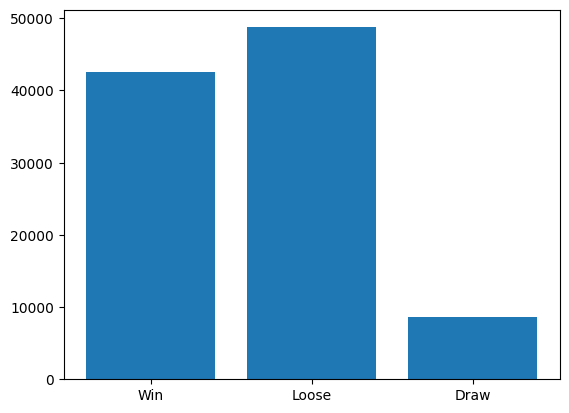

Win : 42.565 %
Loose : 48.754 %
Draw : 8.681 %


In [8]:
# Affichage des résultats.
plt.bar(['Win', 'Loose', 'Draw'], [total_win, total_loose, total_draw])
plt.show()
# Pourcentage des résultats.
print('Win :', total_win / total_episodes * 100, '%')
print('Loose :', total_loose / total_episodes * 100, '%')
print('Draw :', total_draw / total_episodes * 100, '%')